In [3]:
from manim import *
config.media_embed = True

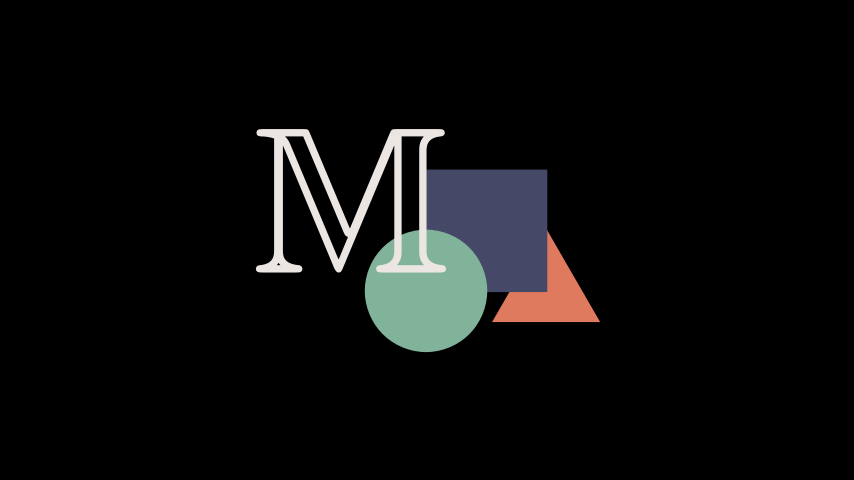

In [4]:
%%manim -v WARNING  --progress_bar None -s -ql --disable_caching MyExample
class MyExample(Scene):
    def construct(self):
        m= ManimBanner()
        self.add(m)

In [5]:
%%manim -v WARNING  --progress_bar None -ql --disable_caching WelcomeText
class WelcomeText(Scene):
    def construct(self):
        welcome_text = Text("Welcome Web Developers", font_size=48, color=WHITE)
        self.play(Write(welcome_text))
        self.wait(2)

In [27]:
%%manim -v WARNING  --progress_bar None -ql --disable_caching CircleToSquare

class CircleToSquare(Scene):
    def construct(self):
        blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        green_square = Square(color=GREEN, fill_opacity=0.8)
        self.play(Create(blue_circle))
        self.wait()
        
        self.play(Transform(blue_circle, green_square))
        self.wait()

In [12]:
%%manim -v WARNING  --progress_bar None -ql --disable_caching CircleToSquare

image = ImageMobject("lobey.png").scale(0.35) #loading the image for TNT Academy mascot
class CircleToSquare(Scene):
    
    def construct(self):
        #blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        circle = Circle()
        #green_square = Square(color=GREEN, fill_opacity=0.8)
        square = Square()

        lobes = FadeIn(image)

        self.play(lobes)
        
        '''
        self.play(Create(circle))
        self.wait()
        '''
        self.play(Transform(lobes, square))
        self.wait()
        

TypeError: Animation only works on Mobjects

: 

In [28]:
%%manim -v WARNING  --progress_bar None -ql --disable_caching CircleFeatures

class CircleFeatures(Scene):
    def construct(self):
        # Create a circle
        circle = Circle(radius=2)
        
        # Display the circle
        self.play(Create(circle))
        
        # Show radius
        radius_line = Line(circle.get_center(), circle.get_center() + 2 * RIGHT)
        radius_label = MathTex("r").next_to(radius_line, UP).shift(0.5 * RIGHT)
        self.play(Create(radius_line), Write(radius_label))
        
        # Show circumference
        circumference_line = Circle(radius=2.0, color=BLUE).scale(2 * PI)
        circumference_label = MathTex("2\\pi r").next_to(circumference_line, DOWN).shift(1.5 * RIGHT)
        self.play(Create(circumference_line), Write(circumference_label))
        
        # Show area
        area_label = MathTex("\\pi r^2").next_to(circle, RIGHT).shift(2 * DOWN)
        self.play(Write(area_label))
        
        self.wait(2)

# Sine

In [20]:
%%manim -v WARNING  --progress_bar None -ql --disable_caching SineWave

class SineWave(Scene):
    def construct(self):
        # Draw the sine wave
        sine_wave = FunctionGraph(lambda x: np.sin(x), color=BLUE)
        self.play(Create(sine_wave))

        # Show the amplitude
        amplitude_text = Text("Amplitude", color=WHITE).scale(0.7).to_edge(UP)
        self.play(Write(amplitude_text))

        amplitude_arrow = Arrow(
            start=amplitude_text.get_bottom(),
            end=sine_wave.point_from_proportion(0.25) + UP * 1.5,
            buff=0,
            color=YELLOW,
        )
        self.play(Create(amplitude_arrow))

        # Show the frequency
        frequency_text = Text("Frequency", color=WHITE).scale(0.7).to_edge(UP)
        self.play(Transform(amplitude_text, frequency_text))

        frequency_arrow = Arrow(
            start=frequency_text.get_bottom(),
            end=sine_wave.point_from_proportion(0.75) + UP * 1.5,
            buff=0,
            color=GREEN,
        )
        self.play(Create(frequency_arrow))

        # Wait for some time before ending the scene
        self.wait(2)

## Full TNT Academy Welcome message

In [29]:
%%manim -v WARNING  --progress_bar None -ql --disable_caching WelcomeLobes

class WelcomeLobes(Scene):
    def construct(self):
        # Display "Welcome to TNT Academy"
        text_welcome = Text("Welcome to TNT Academy").scale(1.5)
        self.play(Write(text_welcome))
        self.wait(2)

        # Display "by Triton Neurotech"
        text_by = Text("by Triton Neurotech").next_to(text_welcome, DOWN)
        self.play(Write(text_by))
        self.wait(3)

        # Create shapes: circle, square, triangle
        shapes = [Circle(), Square(), Triangle()]
        for shape in shapes:
            self.play(Create(shape))
            self.wait(1)
            self.play(Uncreate(shape))

        # Display image "lobey.png"
        image = ImageMobject("lobey.png").scale(0.35)
        self.play(FadeIn(image))
        self.wait(2)


## Random walk for 500 particles and 100000 steps

In [30]:
%%time
np.random.seed(20)
steps = np.random.choice(a=[-1, 0, 1], size=(100000,1000))
stop = steps.cumsum(0)
end_points= stop[-1]/stop[-1].max()
end_pointsX = end_points[0:499]
end_pointsY = end_points[500:-1]

CPU times: total: 6.77 s
Wall time: 9.58 s


In [31]:
%%time
%%manim -r 480p
class Example(Scene):
    def construct(self):
        radius= (end_pointsX*end_pointsX + end_pointsY * end_pointsY)**0.5
        dots = VGroup()
        for  x,y,r in zip(end_pointsX, end_pointsY,radius):
            c= interpolate_color(YELLOW, RED, r)
            dots.add(Dot(color=c,point=[3*x,3*y,0]).scale(0.7))
        self.add(dots)

IndexError: tuple index out of range

## State Spaces

## Video

In [7]:
%%manim -v WARNING  --progress_bar None -ql --disable_caching EquationSequence


class EquationSequence(Scene):
    def construct(self):
        # Text at the top
        title = Text("What's the name of this equation?").to_edge(UP)
        
        # Equations
        equation1 = MathTex("E = mc^2")
        equation2 = MathTex("a^2 + b^2 = c^2")
        equation3 = MathTex("\\frac{d}{dx}e^x = e^x")
        
        # Position the equations
        equation1.move_to(ORIGIN)
        equation2.move_to(ORIGIN)
        equation3.move_to(ORIGIN)
        
        # Add the title and the first equation
        self.add(title)
        self.play(Write(equation1))
        self.wait(0.5)
        
        # Transform to the second equation
        self.play(Transform(equation1, equation2))
        self.wait(0.5)
        
        # Transform to the third equation
        self.play(Transform(equation1, equation3))
        self.wait(0.5)

In [16]:
%%manim -v WARNING  --progress_bar None -ql --disable_caching ExtendedEquationSequence

class ExtendedEquationSequence(Scene):
    def construct(self):
        # Text at the top
        title = Text("What's the name of this equation?").to_edge(UP)
        self.add(title)
        
        # List of equations
        equations = [
            MathTex("I_{\\text{m}} = C_m \\frac{dV}{dt}"),
            MathTex("I_{\\text{ion}} = I_{\\text{Na}} + I_{\\text{K}} + I_{\\text{L}}"),
            MathTex("I_{\\text{ion}} = g_{\\text{ion}} (V - E_{\\text{ion}})"),
            MathTex("I_{\\text{Na}} = g_{\\text{Na}} (V - E_{\\text{Na}})"),
            MathTex("I_{\\text{K}} = g_{\\text{K}} (V - E_{\\text{K}})"),
            MathTex("I_{\\text{L}} = g_{\\text{L}} (V - E_{\\text{L}})"),
            MathTex("g_{\\text{Na}} = \\bar{g}_{\\text{Na}} m^3 h"),
            MathTex("g_{\\text{K}} = \\bar{g}_{\\text{K}} n^4"),
            MathTex("\\frac{dm}{dt} = \\alpha_m (1 - m) - \\beta_m m"),
            MathTex("\\frac{dh}{dt} = \\alpha_h (1 - h) - \\beta_h h"),
            MathTex("\\frac{dn}{dt} = \\alpha_n (1 - n) - \\beta_n n"),
            MathTex("\\alpha_m = \\frac{0.1 (V + 40)}{1 - \\exp \\left( -\\frac{V + 40}{10} \\right)}"),
            MathTex("\\beta_m = 4 \\exp \\left( -\\frac{V + 65}{18} \\right)"),
            MathTex("\\alpha_h = 0.07 \\exp \\left( -\\frac{V + 65}{20} \\right)"),
            MathTex("\\beta_h = \\frac{1}{1 + \\exp \\left( -\\frac{V + 35}{10} \\right)}"),
            MathTex("\\alpha_n = \\frac{0.01 (V + 55)}{1 - \\exp \\left( -\\frac{V + 55}{10} \\right)}"),
            MathTex("\\beta_n = 0.125 \\exp \\left( -\\frac{V + 65}{80} \\right)"),
            MathTex("C_m \\frac{dV}{dt} = \\bar{g}_{\\text{Na}} m^3 h (V - E_{\\text{Na}}) + \\bar{g}_{\\text{K}} n^4 (V - E_{\\text{K}}) + g_{\\text{L}} (V - E_{\\text{L}})")
        ]
        
        # Position all equations to center
        # for eq in equations:
        #     eq.move_to(ORIGIN)

        # for i,eq in len(equations):
        #     if i == 0:
        #         self.play(Write(equations[0]))
        #     else:
        #         self.play(Transform(equations[i-1], equations[i]))
        #     self.wait(0.4)

        for i, eq in enumerate(equations):
            if i == 0:
                self.play(Write(eq))
            else:
                self.play(Transform(equations[i-1], eq))
            self.wait(0.4)
        
        # self.wait()
                


In [31]:
%%manim -v WARNING  --progress_bar None -ql --disable_caching MultipleEquations

# config.frame_width = 9
# config.frame_height = 16

# config.pixel_width = 1080
# config.pixel_height = 1920

class MultipleEquations(Scene):
    def construct(self):

        # Text at the top
        title = Text("What's the name of this equation?").to_edge(UP)
        self.add(title)
        
        # List of equations
        equations = [
            MathTex(r"I_{\text{m}} = C_m \frac{dV}{dt}"),
            MathTex(r"I_{\text{ion}} = I_{\text{Na}} + I_{\text{K}} + I_{\text{L}}"),
            MathTex(r"I_{\text{ion}} = g_{\text{ion}} (V - E_{\text{ion}})"),
            MathTex(r"I_{\text{Na}} = g_{\text{Na}} (V - E_{\text{Na}})"),
            MathTex(r"I_{\text{K}} = g_{\text{K}} (V - E_{\text{K}})"),
            MathTex(r"I_{\text{L}} = g_{\text{L}} (V - E_{\text{L}})"),
            MathTex(r"g_{\text{Na}} = \bar{g}_{\text{Na}} m^3 h"),
            MathTex(r"g_{\text{K}} = \bar{g}_{\text{K}} n^4"),
            MathTex(r"\frac{dm}{dt} = \alpha_m (1 - m) - \beta_m m"),
            MathTex(r"\frac{dh}{dt} = \alpha_h (1 - h) - \beta_h h"),
            MathTex(r"\frac{dn}{dt} = \alpha_n (1 - n) - \beta_n n"),
            MathTex(r"\alpha_m = \frac{0.1 (V + 40)}{1 - \exp \left( -\frac{V + 40}{10} \right)}"),
            MathTex(r"\beta_m = 4 \exp \left( -\frac{V + 65}{18} \right)"),
            MathTex(r"\alpha_h = 0.07 \exp \left( -\frac{V + 65}{20} \right)"),
            MathTex(r"\beta_h = \frac{1}{1 + \exp \left( -\frac{V + 35}{10} \right)}"),
            MathTex(r"\alpha_n = \frac{0.01 (V + 55)}{1 - \exp \left( -\frac{V + 55}{10} \right)}"),
            MathTex(r"\beta_n = 0.125 \exp \left( -\frac{V + 65}{80} \right)"),
            MathTex(r"C_m \frac{dV}{dt} = \bar{g}_{\text{Na}} m^3 h (V - E_{\text{Na}}) + \bar{g}_{\text{K}} n^4 (V - E_{\text{K}}) + g_{\text{L}} (V - E_{\text{L}})")
        ]
        
        # Position the equations
        for eq in equations:
            eq.move_to(ORIGIN)
        
        # Display each equation for 0.4 seconds
        current_equation = equations[0]
        self.play(Write(current_equation))
        self.wait(0.4)
        
        for next_equation in equations[1:]:
            self.play(Transform(current_equation, next_equation))
            self.wait(0.4)
        
        # self.wait()

        # Highlight the last equation
        highlighted_equation = equations[-1].copy().set_color(BLUE)
        surrounding_rectangle = SurroundingRectangle(highlighted_equation, color=BLUE, buff=0.2)
        self.play(Transform(current_equation, highlighted_equation), Create(surrounding_rectangle))
        self.wait(2)


# To run the above script, you need to save it in a .py file and execute it with Manim


TypeError: MultipleEquations.__init_subclass__() takes no keyword arguments